## Описание проекта

### Цель проекта

Компания "Стримчик" продает компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности.Это нужно для того, чтобы сделать ставку на успешный продукт и верно спланировать рекламную компанию.

Обрабатываются данные до 2016 года. Необходимо отработать принцип работы с данными.

NB: В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаги в соответствии с заданием на проект

1. Открыть файл и изучить общую информацию
2. Подготовить данные:
    - заменить названия столбцов (привести к нижнему регистру);
    - преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
    - Обработать пропуски при необходимости: 
        - Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать;
        - Описать причины, которые могли привести к пропускам;
        - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
        - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных:
    - посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - не учитывать в работе данные за предыдущие годы.
    - какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
    - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
    - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
    - соотнести выводы с продажами игр на других платформах.
    - посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составьте портрет пользователя каждого региона (Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
   Задать самостоятельно пороговые значения alfa. Пояснить:
    - Как вы сформулировал нулевую и альтернативную гипотезы;
    - Какой критерий применил для проверки гипотез и почему.
6. Написать общий вывод.
    

## Изучение файла данных

### Открытие файлов и анализ

Импортируем библиотеки, которые нам могут понадобиться в процессе исследования

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

Открываем файл данных.

In [2]:
games_db = pd.read_csv( '/datasets/games.csv')

Для начала проведем общий обзор датафрейма, используя info и head 

In [3]:
games_db.info()
games_db.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Что видим:
1. В датафрейме 16715 строк в 11 столбцах.
2. Заголовки всех столбцов нужно будет привести к "змеиному регистру".
3. В столбцах Name и Genre не хватает значений в двух строках. Строки, где нам неизвестно название игры, малоинформативны для нас. Их нужно будет удалить. Предварительно проверим: возможно это те же строки, где не указан жанр. Предполагаемая причина - ошибка заполнения.
4. В столбце Year_of_Release отстуствуют значения в 269 ячейках. С одной стороны это примерно 1.6% от общего размера выборки. И возможно эти строки можно просто отбросить. Второй вариант заполнить их какой-нибудь специальной меткой. Перед принятием окончательного решения о способе обработки, посмотрим не попадают ли эти данные целиком на какой-то один регион или жанр. Причиной отсутствия может быть ошибка заполнения. Кстати, если на эти игры нет оценок критиков, пользователей и рейтинга, то они просто еще не выходили? Речь о предпродаже?
5. В столбцах NA_sales, EU_sales, JP_sales, Other_sales пропусков данных не видно, тип float64. Скорее всего эти столбцы заполненые корректно.
6. В столбце Critic_Score не хватает более 8.000 строк. Тип данных float64. Возможно оценок нет потому, что не все игры в принципе интересны критикам и попадают в их обзоры? Заполнение медианными значениями не подходит. Поэтому есть смысл поставить особую метку.
7. В столбцах User_Score и Rating также отсутствует часть значений. Но пока невозможно сказать в чем проблема.

Продолжим изучение данных, используя describe.

In [4]:
games_db.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Что видим:
1. В столбцах NA_sales, EU_sales, JP_sales, Other_sales мы не видим аномальных значений. Скорее всего в них все в порядке.
2. В столбце Critic_Score обращает внимание то, что минимальная оценка критиков - 13. Что подтверждает наше предположение о том, что остальная часть игр оценки критиков просто не имеет. Заменим их на значение -1, которое будет нам говорить о том, что рейтинга критиков нет. Далее будем за этим следить и в нужных местах применять срезы.

Используя фильтр, с помощью isnull посмотрим на строки, где отсутствуют значения в столбце Name. Видим, что также нет данных о жанрах, оценках и рейтинге. Т.е. строчки не представляют ценности для нашего анализа их можно удалить.

In [5]:
games_db[games_db['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Используя unique() и value_counts() посмотрим на уникальные значения в столбце 'User_Score'. Видим, что из 16715 строк в целом 2424 содержат значение tbd в столбце (предполагаю, что рейтинг должен появиться позже). С точки зрения последующего анализа в разрезе пользовательских рейтингов эти данные также не ценны, как и пустые строки с пустыми значениями. Поэтому в этом столбце пустые заменим на tbd. И будем помнить, что это говорит нам об отсутствии оценки.

In [6]:
print (games_db['User_Score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [7]:
print(games_db['User_Score'].value_counts().head(20))

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
Name: User_Score, dtype: int64


Проделаем тоже самое для столбца Rating.

In [8]:
print (games_db['Rating'].unique())
games_db['Rating'].value_counts().head(20)

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Видим, что все заполненные ячейки имеют конкретные значения. Значит для игр, где рейтинга нет, он, возможно, и не присваивался. Заполним их значением NonR (нет рейтинга).

In [9]:
games_db[games_db['Year_of_Release'].isnull()].head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


После применения isnull к столбцу Year_of_Release не видим явных закономерностей. Тем не менее строки сохраним. Заполним их значением, лежащим явно за границами наших данных 1900. А тип измени на int (значение года может быть только целым числом).

### Выводы:

1. Заголовки всех столбцов нужно будет привести к "змеиному регистру".
2. Нужно удалить строки, где не заполнен столбец Name.
3. В столбце Critic_Score заполним отсутствующие значения -1, которое будет нам говорить о том, что оценки критиков нет. Далее будем за этим следить и в нужных местах применять срезы.
4. В столбце Rating заполним отсутствующие значения 'NonR' (нет рейтинга), которое будет нам говорить о том, что рейтинга нет. Далее будем за этим следить и в нужных местах применять срезы.
5. В столбце User_Score заполним отсутствующие значения tbd, которое будет нам говорить о том, что оценки пользователей нет. Далее будем за этим следить и в нужных местах применять срезы.
6. В столбце Year_of_Release заполним отсутствущее значением 1900, а тип приведем к int.

In [10]:
games_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Обработка данных

Переведем значения столбцов в "змеиный" регистр

In [11]:
games_db  =games_db.drop_duplicates().reset_index(drop=True)
games_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
games_db = (games_db.rename(columns={'Name': 'name','Year_of_Release': 'year_of_release', 
                                     'Platform': 'platform', 'Genre': 'genre', 'NA_sales': 'na_sales',
                                     'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales',
                                     'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}))


In [13]:
games_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Удалим строки с пустыми значениями в столбце Name, используя dropna().

In [14]:
games_db = games_db.dropna(subset=['name'])
games_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Используя fillna заменим пропуски в 'critic_score' на -1, 'rating' на NonR, 'user_score' на tbd, 'year_of_release' на 1900.

In [15]:
games_db['critic_score']=games_db['critic_score'].fillna(-1)
games_db['rating']=games_db['rating'].fillna('NonR')
games_db['user_score']=games_db['user_score'].fillna('tbd')
games_db=games_db.dropna(subset=['year_of_release']).reset_index(drop=True)
games_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим в столбце 'year_of_release' тип на целочисленный

In [16]:
games_db['year_of_release'] = games_db['year_of_release'].astype('int')

Посчитаем суммарные продажи во всех регионах по каждой игре и запишем и столбец 'sales_total'

In [17]:
games_db['sales_total']=games_db['na_sales']+games_db['eu_sales']+games_db['jp_sales']+games_db['other_sales']

In [18]:
games_db.info()
games_db.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,tbd,NonR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,tbd,NonR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,tbd,NonR,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,tbd,NonR,28.31


### Результаты:

1. Названия всех столбцов перевели в "змеиный" регистр.
2. Удалили строки с пустым значением в столбце name.
3. Заполнили пропущенные значения в 'critic_score' на -1, 'rating' на NonR, 'user_score' на tbd, 'year_of_release' на 1900.
4. В столбце year_of_release изменили тип данных на целочисленный.
5. Добавили столбец sales_total, содержащий суммарные продажи по каждой игре по всем регионам.



In [19]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games_db.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Оценка количества выпущенных игр по годам

Построим диаграмму количества выходивших за год игр по годам, используя сводную таблицу.

[Text(0.5, 1.0, 'Количество выпущенных игр по годам, 1980_2016 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Количество')]

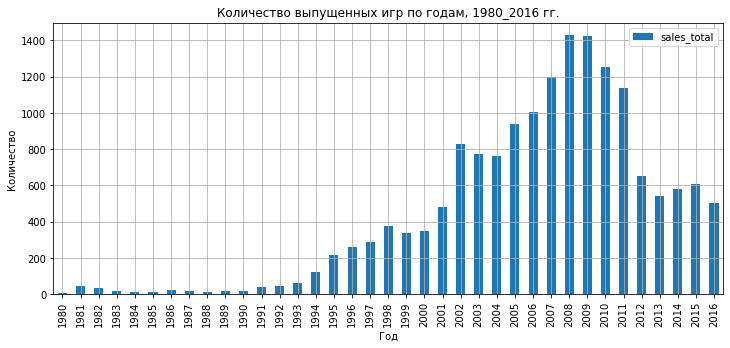

In [20]:
(games_db.pivot_table(index='year_of_release',values='sales_total', aggfunc='count').plot(kind='bar',grid=True, figsize=(12, 5))
 .set(title = 'Количество выпущенных игр по годам, 1980_2016 гг.', xlabel = 'Год', ylabel = 'Количество'))

Видим, что мы вполне можем обойтись не всеми данными, а данными за 22 года (с 1995 по 2016 включительно), когда выходило более 20 игр в год.

### Анализ продаж по годам в разрезе платформ

Проанализируем для игор каких платформ выручка была максимальной. Для начала сгруппируем данные по столбцу 'platform' и проведем предварительный отсев. Отбросим компании с общей выручкой менее 100.

In [21]:
games_db_platform=games_db.groupby('platform').sum().sort_values('sales_total',ascending=False)
games_db_platform

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,sales_total
platform,,,,,,,
PS2,4263750,572.92,332.63,137.54,190.47,86759.0,1233.56
X360,2476173,595.74,268.32,12.30,84.88,61067.0,961.24
PS3,2626158,390.13,327.21,79.41,134.59,56155.0,931.34
Wii,2583531,486.87,258.32,68.28,77.71,34940.0,891.18
DS,4259361,380.31,188.41,175.02,59.04,43707.0,802.78
PS,2377627,334.72,212.39,139.78,40.69,13037.0,727.58
PS4,789937,108.74,141.09,15.96,48.35,18027.0,314.14
GBA,1624604,184.12,74.59,46.56,7.61,28563.0,312.88
PSP,2396417,107.27,65.62,75.88,40.76,30059.0,289.53


Построим диаграмму по срезу, где суммарная выручка по платформе составила более 100 млн. Видим, что после первых шести платформ происходит резкий спад выручки.

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам, 1980_2016 гг.'),
 Text(0.5, 0, 'Платформа'),
 Text(0, 0.5, 'Выручка от продаж')]

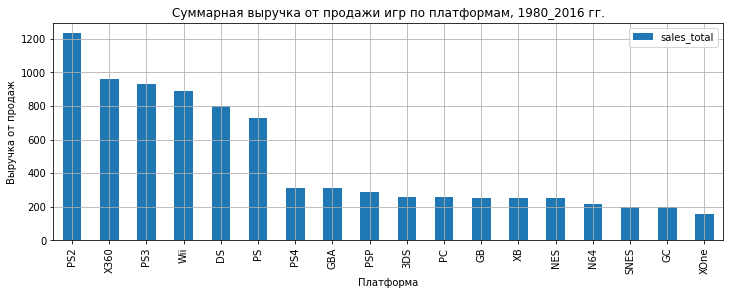

In [22]:
(
    games_db_platform.query('sales_total>100').plot(kind='bar', y = 'sales_total',grid=True, figsize=(12, 4))
 .set(title = 'Суммарная выручка от продажи игр по платформам, 1980_2016 гг.', xlabel = 'Платформа',
      ylabel = 'Выручка от продаж')
)

Итак сформируем фрейм с топ-6 игровых платформ и фрейм платформ с суммарной выручкой более 100 млн.

In [23]:
games_db_platform_t = games_db_platform.query('sales_total>500').reset_index()
top_pl=games_db_platform_t['platform']
top_pl

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

In [24]:
games_db_platform_one_hundred = games_db_platform.query('sales_total>100').reset_index()
top_one_hundred=games_db_platform_one_hundred['platform']
top_one_hundred

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      PS4
7      GBA
8      PSP
9      3DS
10      PC
11      GB
12      XB
13     NES
14     N64
15    SNES
16      GC
17    XOne
Name: platform, dtype: object

Сформируем датафрейм games_platform_top, где будут содеражаться данные о продажах только по играм топовых игровых платформ.

In [25]:
games_platform_top=games_db.query('platform in @top_pl').reset_index()

games_platform_top['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

In [26]:
games_platform_top.head(10)


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,tbd,NonR,24.67
7,11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по топовым платформам и по годам, 1980_2016 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

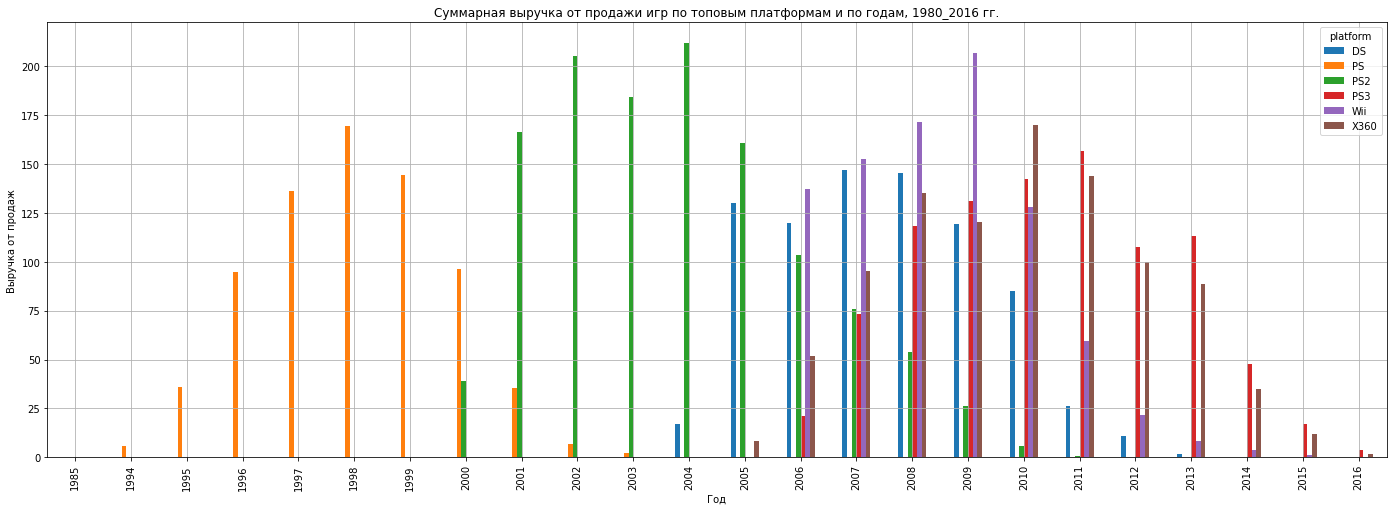

In [27]:
(
    games_platform_top.pivot_table(index = 'year_of_release',columns=['platform'], values=['sales_total'],
                                   aggfunc='sum').plot(kind='bar', y = 'sales_total',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по топовым платформам и по годам, 1980_2016 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

Предварительно из этой диаграммы можно сказать, что цикл появления-развития-ухода платформ составляет 8-9 лет. Попробуем взять более узкий срез по годам (с 2000 года)

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам, 2000_2016 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

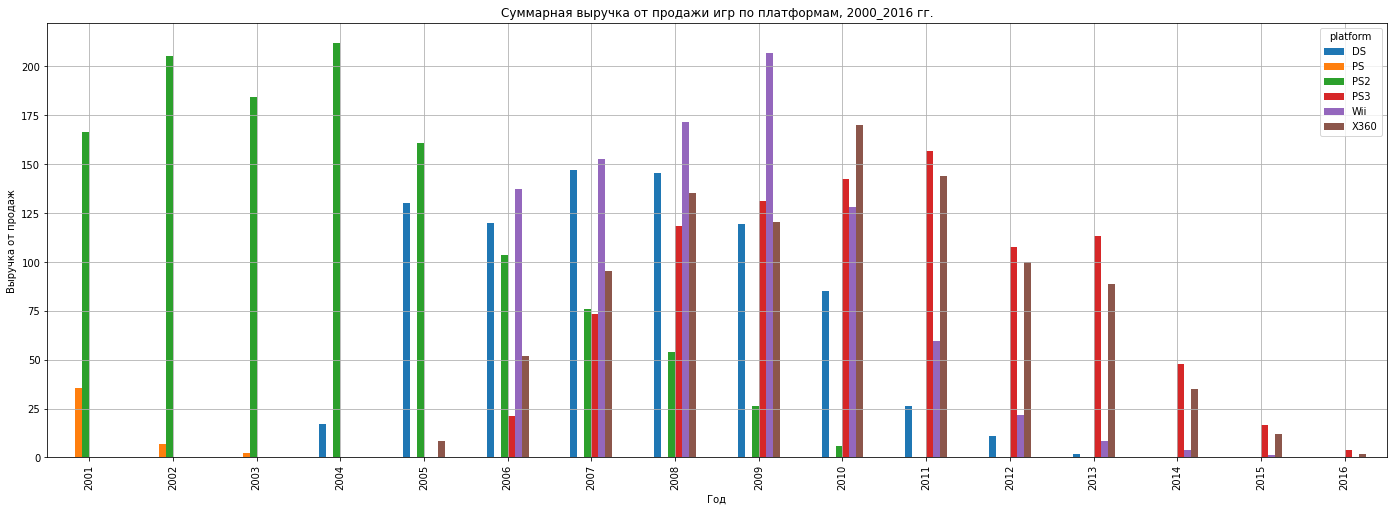

In [28]:
(
    games_platform_top.query('year_of_release>2000').pivot_table(index = 'year_of_release',columns=['platform'], values=['sales_total'],
                                   aggfunc='sum').plot(kind='bar', y = 'sales_total',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам, 2000_2016 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

Получаем выводы:
1. Цикл цикл появления-развития-ухода платформ составляет 8-9 лет. Далее для анализа можем взять данные, начиная с 2009 года.
2. Все наши определенные ранее топовые по объему продаж платформы уже сошли со сцены. Пока еще входу, но уже в нисходящей области только PS3 и X360

### Актуальные данные

Сформируем срез games_db_actual, куда войдут данные о продажа только начиная с 2009 года по 2015 год включительно, а выручка составила более 100 млн. 2016 год не вошел, так как к моменту выгрузки он еще не завершился и может сместить оценку.

In [29]:
games_db_actual=games_db.query('year_of_release>2013  and platform in @top_one_hundred').reset_index()
games_db_actual.info()
games_db_actual.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1321 non-null   int64  
 1   name             1321 non-null   object 
 2   platform         1321 non-null   object 
 3   year_of_release  1321 non-null   int64  
 4   genre            1321 non-null   object 
 5   na_sales         1321 non-null   float64
 6   eu_sales         1321 non-null   float64
 7   jp_sales         1321 non-null   float64
 8   other_sales      1321 non-null   float64
 9   critic_score     1321 non-null   float64
 10  user_score       1321 non-null   object 
 11  rating           1321 non-null   object 
 12  sales_total      1321 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 134.3+ KB


,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,sales_total
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,8945.690386,2014.964421,0.198471,0.192279,0.053929,0.058024,33.499621,0.502702
std,5050.398489,0.803085,0.482171,0.516075,0.228308,0.157321,37.616106,1.146113
min,31.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.010000
25%,4425.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.040000
50%,9567.000000,2015.000000,0.030000,0.040000,0.000000,0.010000,-1.000000,0.120000
75%,13516.000000,2016.000000,0.160000,0.150000,0.040000,0.040000,73.000000,0.440000
max,16439.000000,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,14.630000


[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

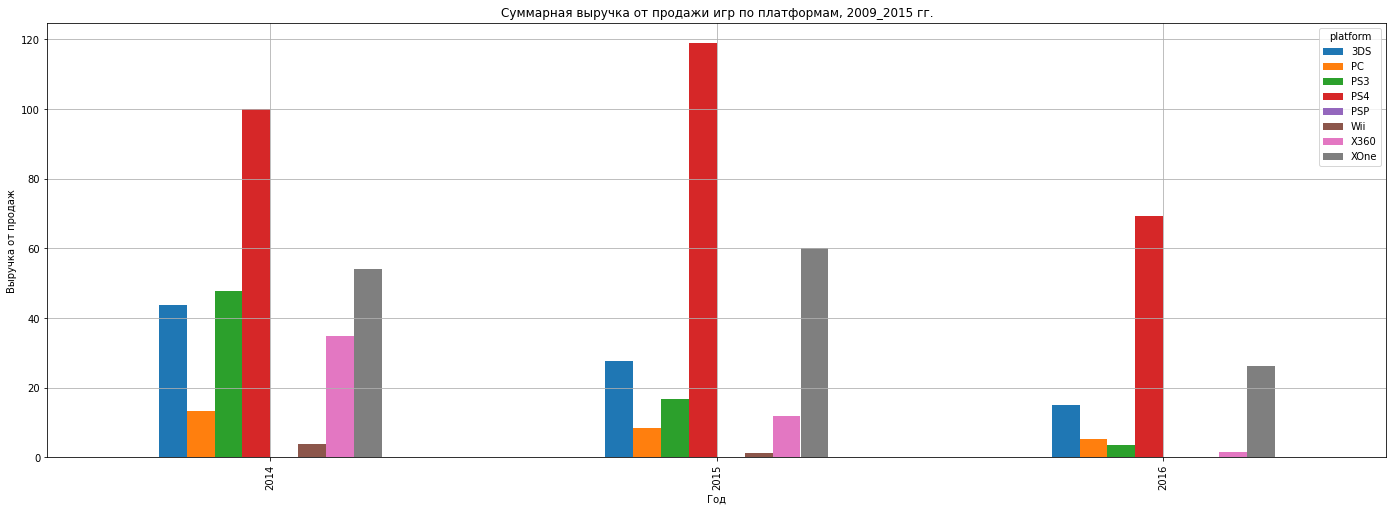

In [30]:
(
    games_db_actual.pivot_table(index = 'year_of_release',columns=['platform'], values=['sales_total'],
                                   aggfunc='sum').plot(kind='bar', y = 'sales_total',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

C учетом того, что 2016 на момент выборки еще не завершен и ранее установленного "жизненного цикла" платформы в 8-9 лет можно сказать, что в восходящей стадии развития находятся XOne и PS4. Уже начала падать, но имеется пара лет у 3DS.

### Построение диграммы разброса для глобальных продаж игр.

['PS4' '3DS' 'XOne' 'PS3' 'X360' 'PC' 'Wii' 'PSP']


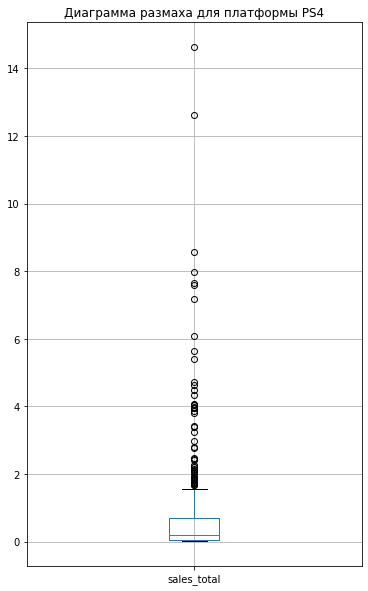

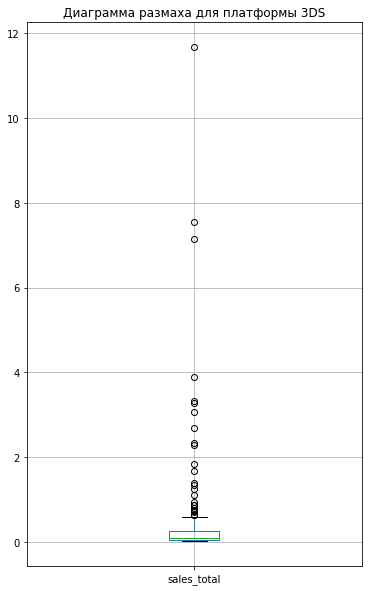

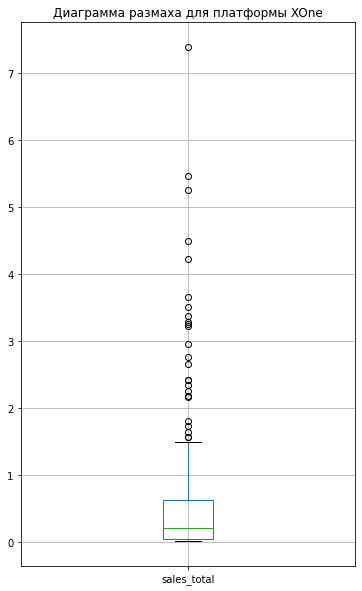

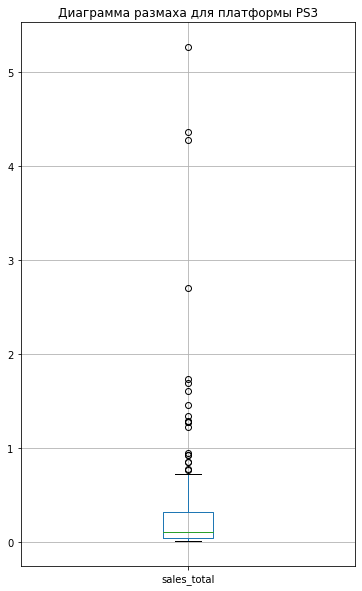

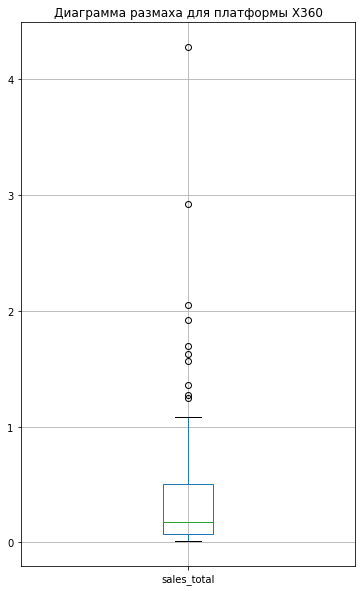

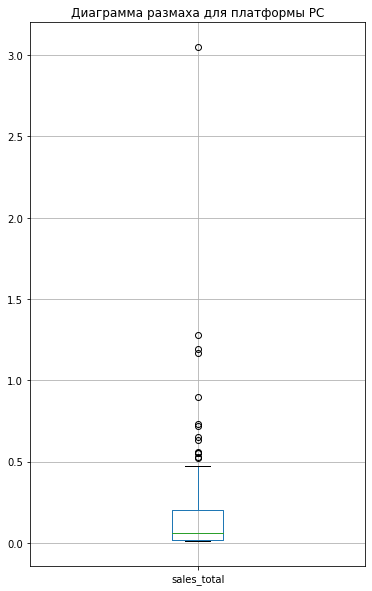

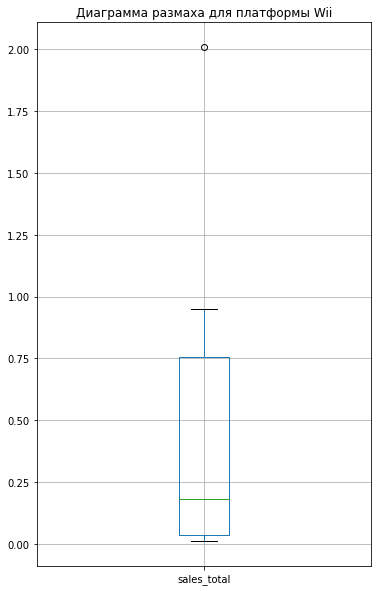

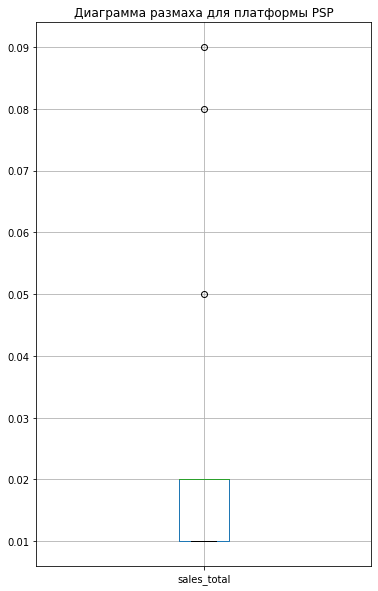

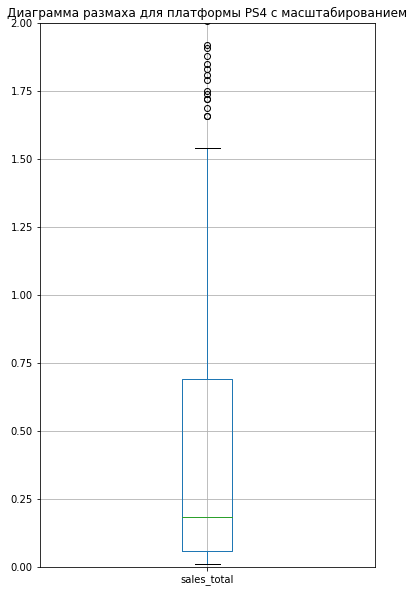

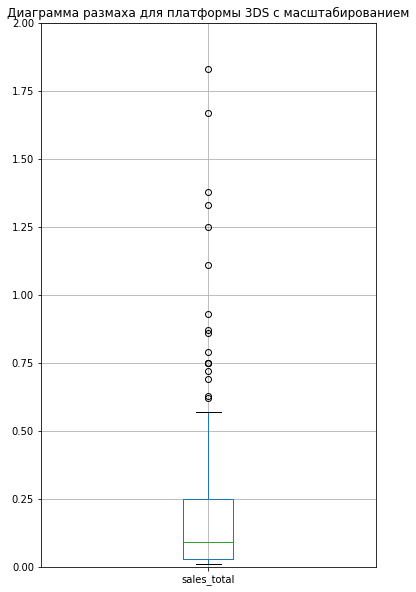

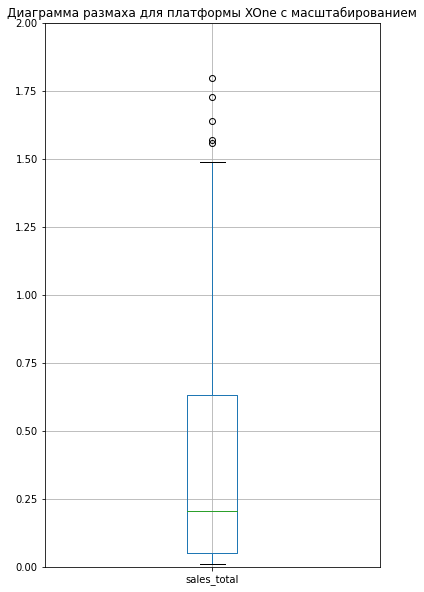

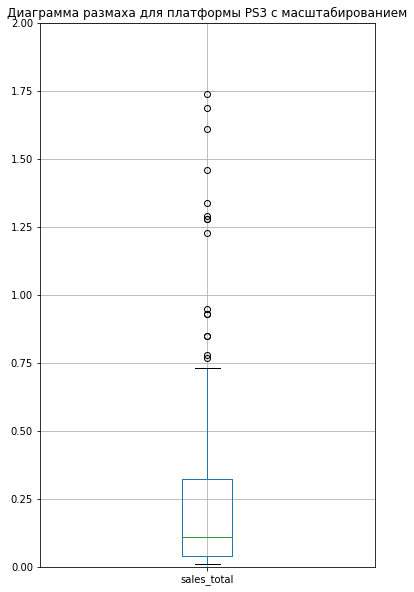

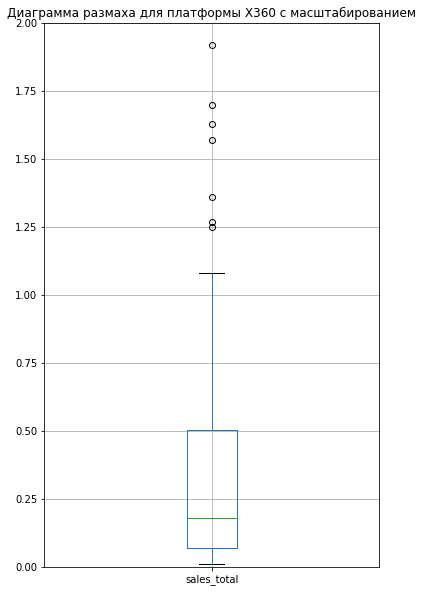

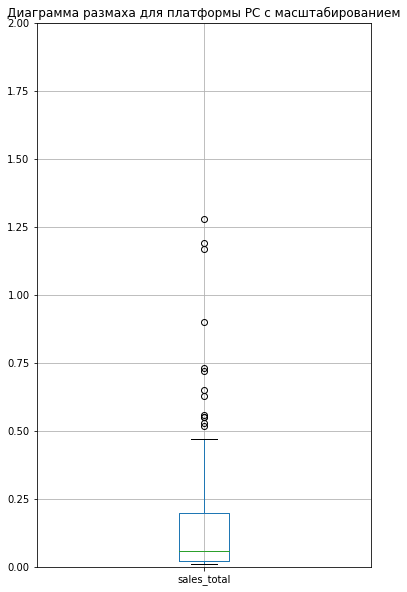

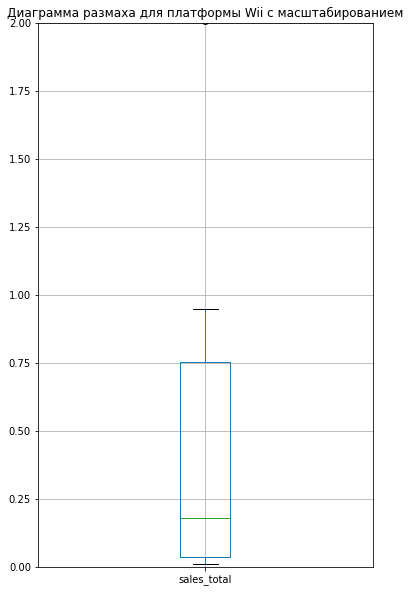

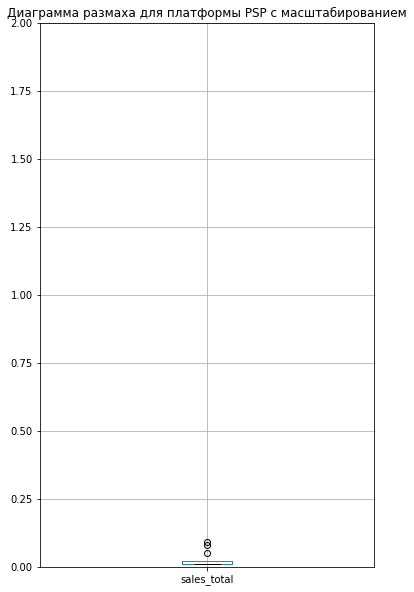

In [31]:

temp = games_db_actual.copy()
temp_one= temp[['platform','sales_total']]

plat = games_db_actual['platform'].unique()
print (plat)


for i in range(len(plat)):
    plat_l = plat[i]
    plt.figure(figsize=(6, 10))
    temp_one.query('platform == @plat_l').boxplot()
    plt.title('Диаграмма размаха для платформы '+plat_l)
for i in range(len(plat)):
    plat_l = plat[i]
    plt.figure(figsize=(6, 10))    
    plt.ylim(0, 2)
    temp_one.query('platform == @plat_l').boxplot()
    plt.title('Диаграмма размаха для платформы '+plat_l+ ' с масштабированием')
   
 


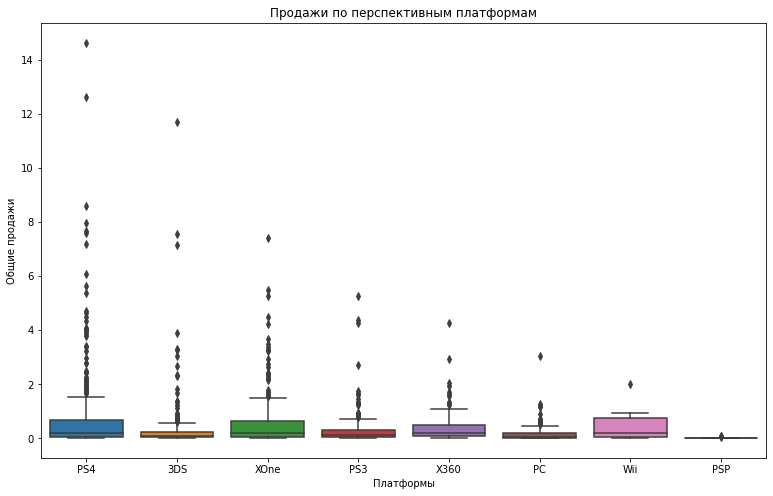

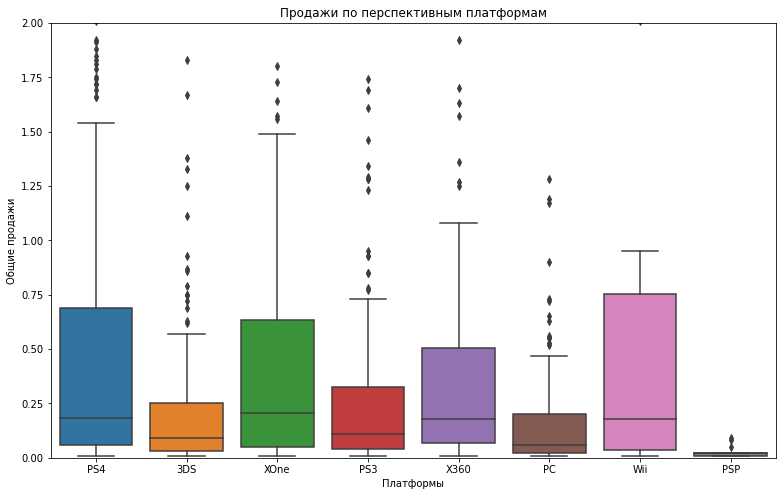

In [61]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = games_db_actual, 'sales_total'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

Анализ этих диаграмм показывает, что для тех платформ, которые мы обозначили как платформы с перспективой роста (PS4, ХOne) медианные значения находятся недалеко от нуля. При этом выбросы достигают 7-14 млн. Это говорит нам о том, что не все игры одинаково прибыльны. Большая часть не "выстреливает". Для предыдущих платформ этих же произвоидетелей  (PS3,X360) сутуация схожа.

Такая же картина и для платформы 3DS.

Ниже (в п.4.7) попробуем оценить прибыльность отдельных жанров игр. И далее тоже самое сделаем в разделе 5.

### Влияние отзывов критиков пользователей и критиков на продажи на одной из платформ

Рассмотрим такую взаимосвязь на примере игр платформы PS3. Для этого сначала подготовим срез по этой платформе.

In [32]:
games_db_ps_iii =games_db_actual.query('platform == "PS3"').reset_index()
games_db_ps_iii.info()
games_db_ps_iii.describe()
games_db_ps_iii.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          219 non-null    int64  
 1   index            219 non-null    int64  
 2   name             219 non-null    object 
 3   platform         219 non-null    object 
 4   year_of_release  219 non-null    int64  
 5   genre            219 non-null    object 
 6   na_sales         219 non-null    float64
 7   eu_sales         219 non-null    float64
 8   jp_sales         219 non-null    float64
 9   other_sales      219 non-null    float64
 10  critic_score     219 non-null    float64
 11  user_score       219 non-null    object 
 12  rating           219 non-null    object 
 13  sales_total      219 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 24.1+ KB


,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,16,180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,-1.0,tbd,NonR,5.27
1,21,254,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,-1.0,4.8,M,4.36
2,24,263,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-1.0,4.5,E,4.28
3,54,548,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,-1.0,3.2,E,2.70
4,90,1010,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,-1.0,5.1,M,1.74
5,96,1051,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,-1.0,tbd,NonR,1.69
6,102,1129,Destiny,PS3,2014,Shooter,0.68,0.56,0.12,0.25,-1.0,4.5,T,1.61
7,110,1300,Madden NFL 15,PS3,2014,Sports,1.08,0.11,0.00,0.27,-1.0,2.7,E,1.46
8,120,1448,NBA 2K15,PS3,2014,Sports,0.87,0.21,0.02,0.24,-1.0,3.5,E,1.34
9,125,1502,Far Cry 4,PS3,2014,Shooter,0.34,0.68,0.08,0.19,-1.0,7.3,M,1.29


Для поиска корреляции и зависимости сделаем срез, из которого уберем строки, где в столбце critic_score '-1'. Это значит, что оценки критика нет.

<AxesSubplot:xlabel='critic_score', ylabel='sales_total'>

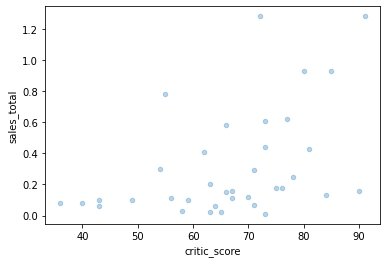

In [33]:
games_db_ps_iii.query('critic_score!=-1').plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3)


In [34]:
print(games_db_ps_iii.query('critic_score!=-1')['sales_total'].corr(games_db_ps_iii.query('critic_score!=-1')['critic_score']))

0.44657460493190704


Видим, что корреляция между оценкой критиков и продажами незначительна.

Для поиска степени зависимости и корреляции между оценкой пользователей и объемом продаж создадим срез, в котором уберем строки, где значение в столбце user_score "tbd". Оставшиеся значения в столбце user_score преобразуем в тип float. Копию создаем, потому что иначе выскакивает предупреждение (не ошибка). 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 206
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          98 non-null     int64  
 1   index            98 non-null     int64  
 2   name             98 non-null     object 
 3   platform         98 non-null     object 
 4   year_of_release  98 non-null     int64  
 5   genre            98 non-null     object 
 6   na_sales         98 non-null     float64
 7   eu_sales         98 non-null     float64
 8   jp_sales         98 non-null     float64
 9   other_sales      98 non-null     float64
 10  critic_score     98 non-null     float64
 11  user_score       98 non-null     float64
 12  rating           98 non-null     object 
 13  sales_total      98 non-null     float64
dtypes: float64(7), int64(3), object(4)
memory usage: 11.5+ KB


<AxesSubplot:xlabel='sales_total', ylabel='user_score'>

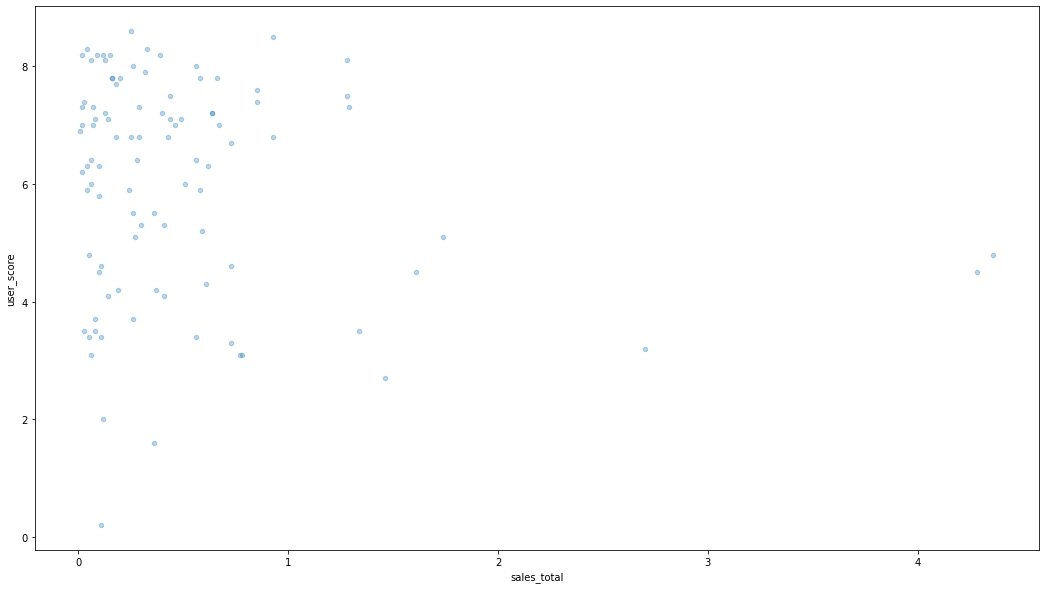

In [35]:
games_db_ps_iii_user = games_db_ps_iii.query('user_score!="tbd"')

games_db_ps_iii_us = games_db_ps_iii_user.copy()
games_db_ps_iii_us['user_score'] = [float(x) for x in games_db_ps_iii_user['user_score']]


games_db_ps_iii_us.info()
games_db_ps_iii_us.plot(x='sales_total', y='user_score', kind='scatter',figsize=(18,10), alpha=0.3)


In [36]:
print(games_db_ps_iii_us['sales_total'].corr(games_db_ps_iii_us['user_score']))

-0.16676141347662116


Видим, что зависимость и корреляция еще меньше, чем в случае с оценкой критиков. Таким влиянием можно пренебречь. Как и влиянием оценки критиков на объем продаж.

### Соотнесение выводов о влиянии оценки критиков и пользователей на объем продаж с другими платформами.

Так как на примере платформы PS3 мы увидели незначительность влияния оценки критиков и пользователей на объем продаж, то для других платформ мы будем также считать это влияние пренебрежимо малым.

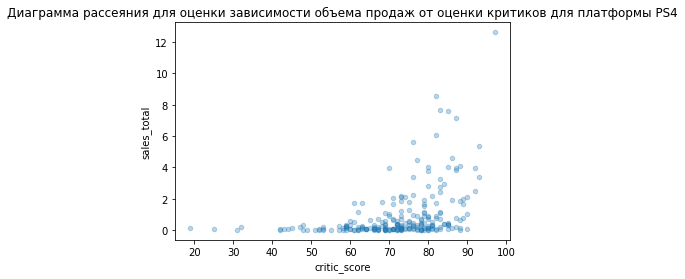

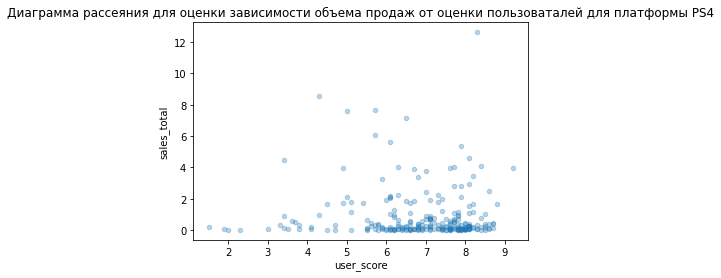

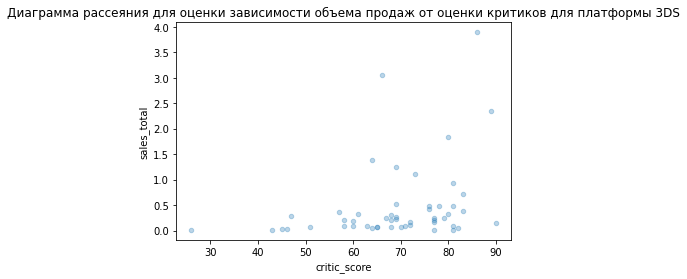

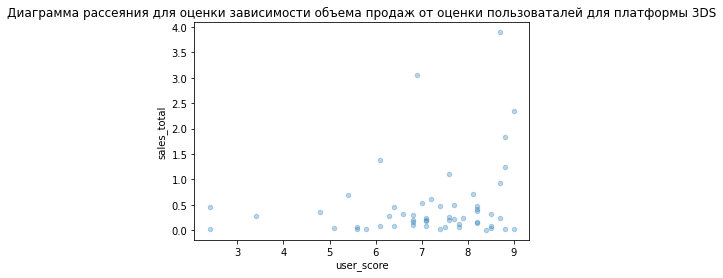

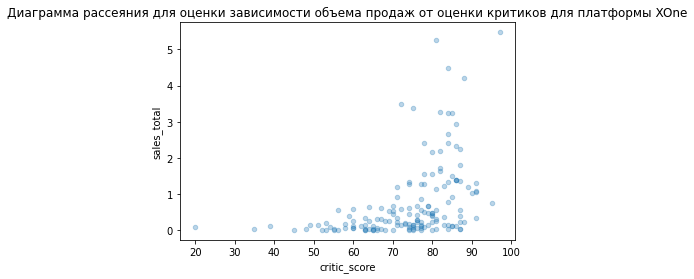

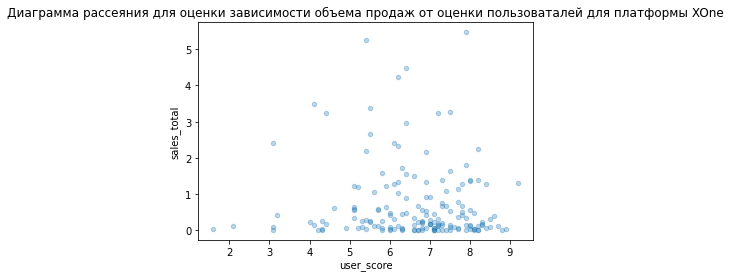

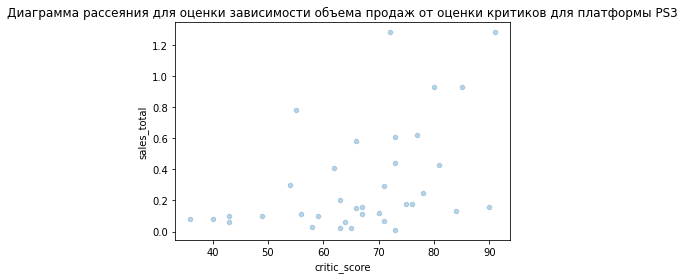

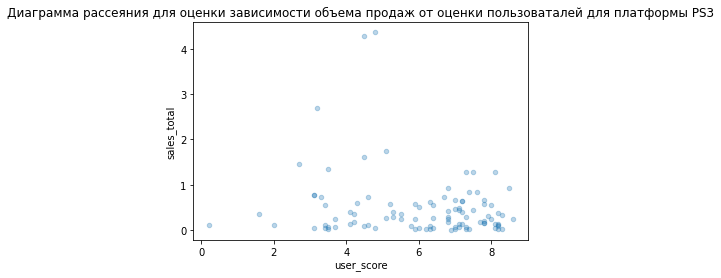

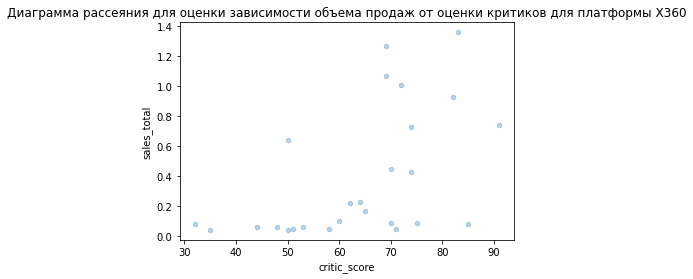

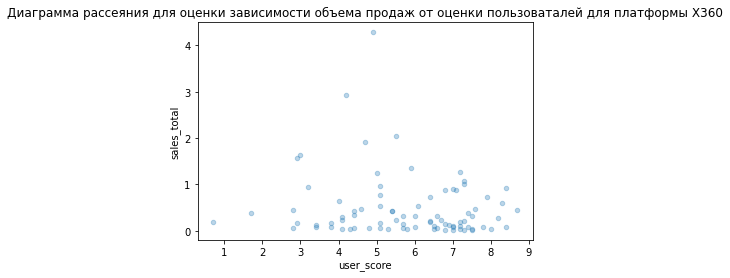

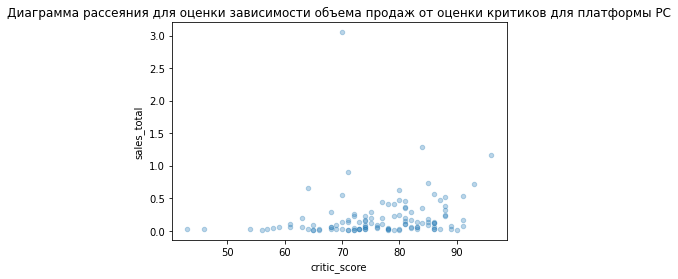

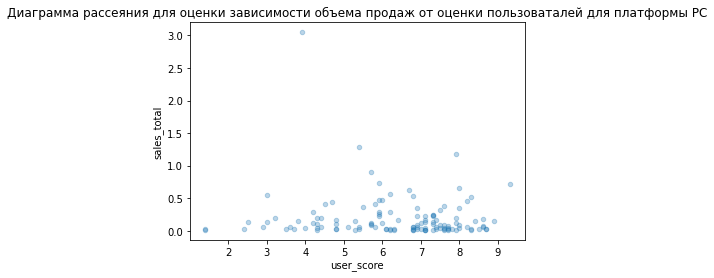

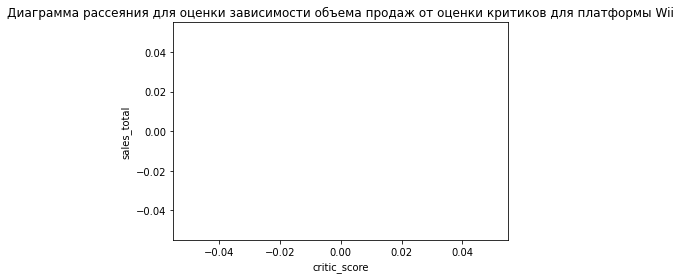

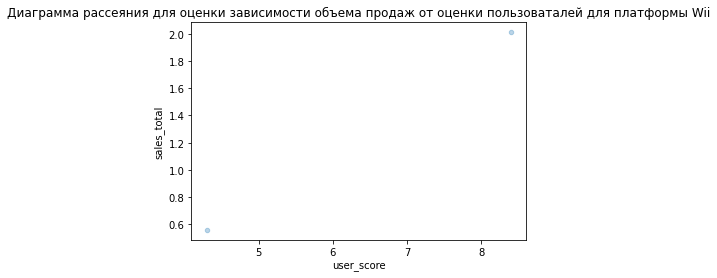

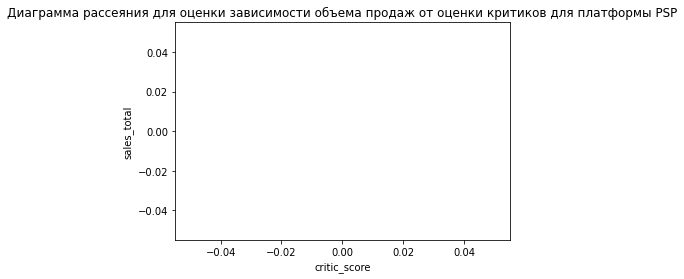

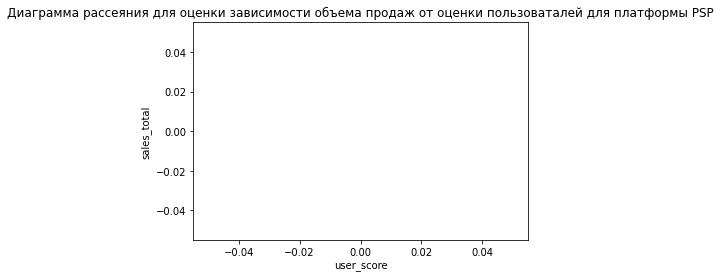

In [37]:
temp_two = games_db_actual.copy()
temp_three= temp_two[['platform','sales_total','critic_score']]
temp_four= temp_two[['platform','sales_total','user_score']]

plat = games_db_actual['platform'].unique()


for i in range(len(plat)):
    
    plat_l = plat[i]
   
    games_db_temp_three = temp_three.query('platform == @plat_l').reset_index()
    games_db_temp_four = temp_four.query('platform == @plat_l').reset_index()
   
    games_db_temp_three.query('critic_score!=-1').plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3)
    plt.title('Диаграмма рассеяния для оценки зависимости объема продаж от оценки критиков для платформы '+plat_l)
       
    games_db_temp_four = games_db_temp_four.query('user_score!="tbd"')

    games_db_temp_four_us = games_db_temp_four.copy()
    games_db_temp_four_us['user_score'] = [float(x) for x in games_db_temp_four_us['user_score']]

    games_db_temp_four_us.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3)
    plt.title('Диаграмма рассеяния для оценки зависимости объема продаж от оценки пользоваталей для платформы '+plat_l)


In [38]:
for k in range(len(plat)):
    
    plat_l = plat[k]
    
    games_db_temp_three = temp_three.query('platform == @plat_l').reset_index()
    games_db_temp_four = temp_four.query('platform == @plat_l').reset_index()
   
    print ('Коффицент корелляции для оценки зависимости между продажами и оценкой критиков для платформы: ', plat_l)
    print( games_db_temp_three.query('critic_score!=-1')['sales_total'].corr( games_db_temp_three.query('critic_score!=-1')['critic_score']))
   
    games_db_temp_four = games_db_temp_four.query('user_score!="tbd"')

    games_db_temp_four_us = games_db_temp_four.copy()
    games_db_temp_four_us['user_score'] = [float(x) for x in games_db_temp_four_us['user_score']]
    print ('Коффицент корелляции для оценки зависимости между продажами и оценкой пользователей для платформы: ', plat_l)
    print(games_db_temp_four_us['sales_total'].corr(games_db_temp_four_us['user_score']))   

Коффицент корелляции для оценки зависимости между продажами и оценкой критиков для платформы:  PS4
0.40266141068104083
Коффицент корелляции для оценки зависимости между продажами и оценкой пользователей для платформы:  PS4
-0.040131589472697356
Коффицент корелляции для оценки зависимости между продажами и оценкой критиков для платформы:  3DS
0.31411749286905105
Коффицент корелляции для оценки зависимости между продажами и оценкой пользователей для платформы:  3DS
0.2151932718527028
Коффицент корелляции для оценки зависимости между продажами и оценкой критиков для платформы:  XOne
0.42867694370333226
Коффицент корелляции для оценки зависимости между продажами и оценкой пользователей для платформы:  XOne
-0.0703839280647581
Коффицент корелляции для оценки зависимости между продажами и оценкой критиков для платформы:  PS3
0.44657460493190704
Коффицент корелляции для оценки зависимости между продажами и оценкой пользователей для платформы:  PS3
-0.16676141347662116
Коффицент корелляции для

Оценка взаиосвязи между объемами продаж и оценками критиков или пользователей, показала, что сильных взаимосвязей нет (как и в случае с платформой PS3)

### Анализ прибыльности различных жанров игр

In [39]:
games_db_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1321 non-null   int64  
 1   name             1321 non-null   object 
 2   platform         1321 non-null   object 
 3   year_of_release  1321 non-null   int64  
 4   genre            1321 non-null   object 
 5   na_sales         1321 non-null   float64
 6   eu_sales         1321 non-null   float64
 7   jp_sales         1321 non-null   float64
 8   other_sales      1321 non-null   float64
 9   critic_score     1321 non-null   float64
 10  user_score       1321 non-null   object 
 11  rating           1321 non-null   object 
 12  sales_total      1321 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 134.3+ KB


[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по жанрам и по годам, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

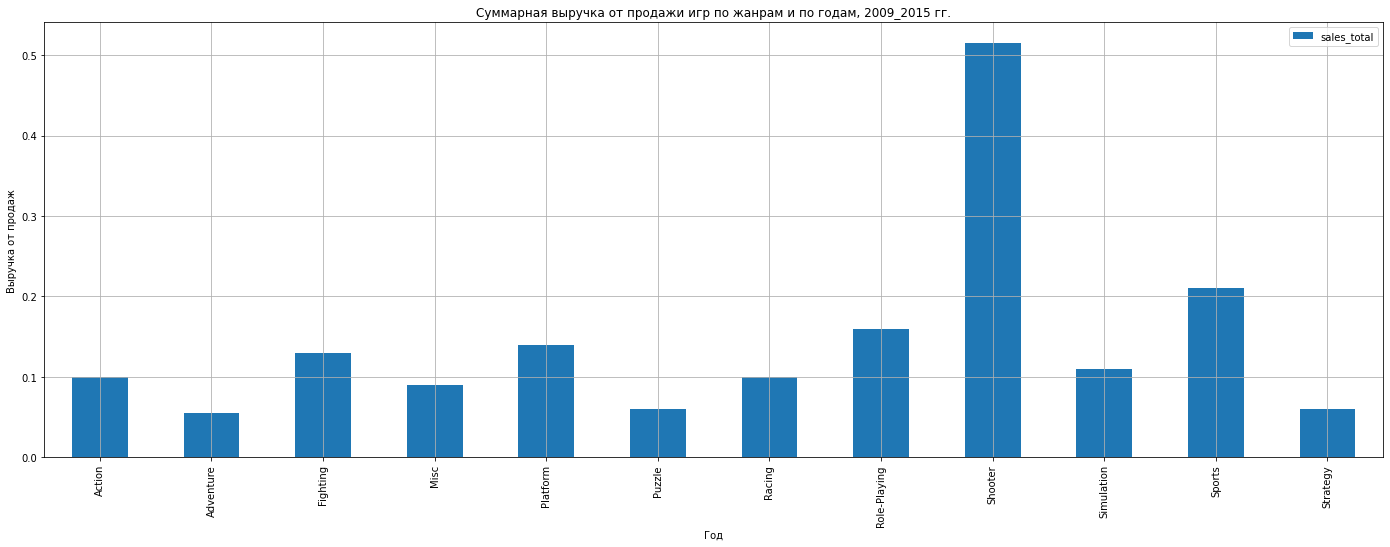

In [40]:
#(
#    games_db_actual.pivot_table(index = 'year_of_release',columns=['genre'], values=['sales_total'],
#                                   aggfunc='median').plot(kind='bar', y = 'sales_total',grid=True, figsize=(24, 8))
# .set(title = 'Суммарная выручка от продажи игр по жанрам и по годам, 2009_2015 гг.', xlabel = 'Год',
#      ylabel = 'Выручка от продаж')
#)
(
    games_db_actual.pivot_table(index = 'genre', values=['sales_total'],
                                   aggfunc='median').plot(kind='bar', y = 'sales_total',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по жанрам и по годам, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)


Из анализа графиков можно выявить следующие особенности:
1. Наиболее популярным (доходным) жанром был и остается жанр Shooter (с большим отрывом).
2. За ним следует жанр Sports.
3. Затем c примерно одинаковыми медианными значениями RPG, Fighting, Platform.
4. Акценты в продажах лучше делать на Shooter, Sports, RPG, Fighting, Platform. 

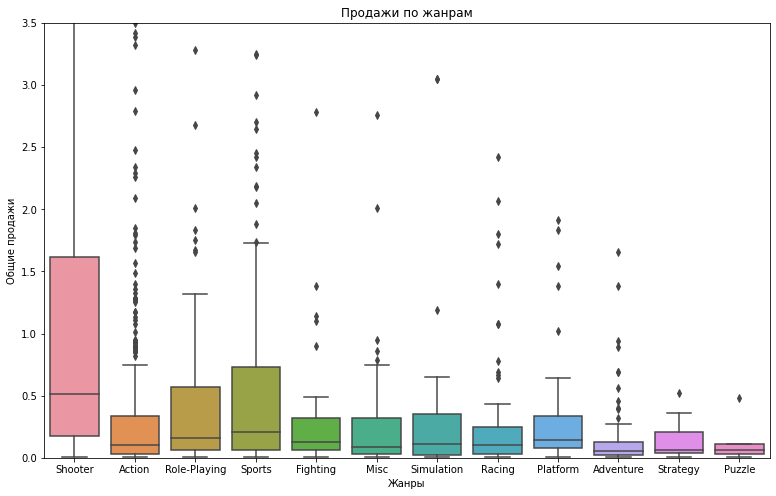

In [62]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = games_db_actual, 'sales_total'
#plt.figure(figsize=(13, 8))
#(sns.boxplot(data = data_temp, y = y, x='genre')
#    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
#plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

### Выводы:

В процессе исследовательского анализа мы установили, что:
1. Для построения прогноза будет вполне достаточно данных за 2009-2015 годы.
2. В прошлом самыми прибыльными игровыми платформами были Wii, DS, X360, PS3, PS2, PS. На момент исследования самыми актуальными платформами являются PS4, XOne. В меньшей степени 3DS.
3. Влияние оценок критиков и пользователей на объемы продаж пренебрежимо мало.
4. Самыми прибыльными жанрами являются (в порядке убывания) Action, Shooter, Sports, RPG.

## Портреты пользователей различных регионов

### Регион NA

#### Самые популярные платформы

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам и по годам в регионе NA, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

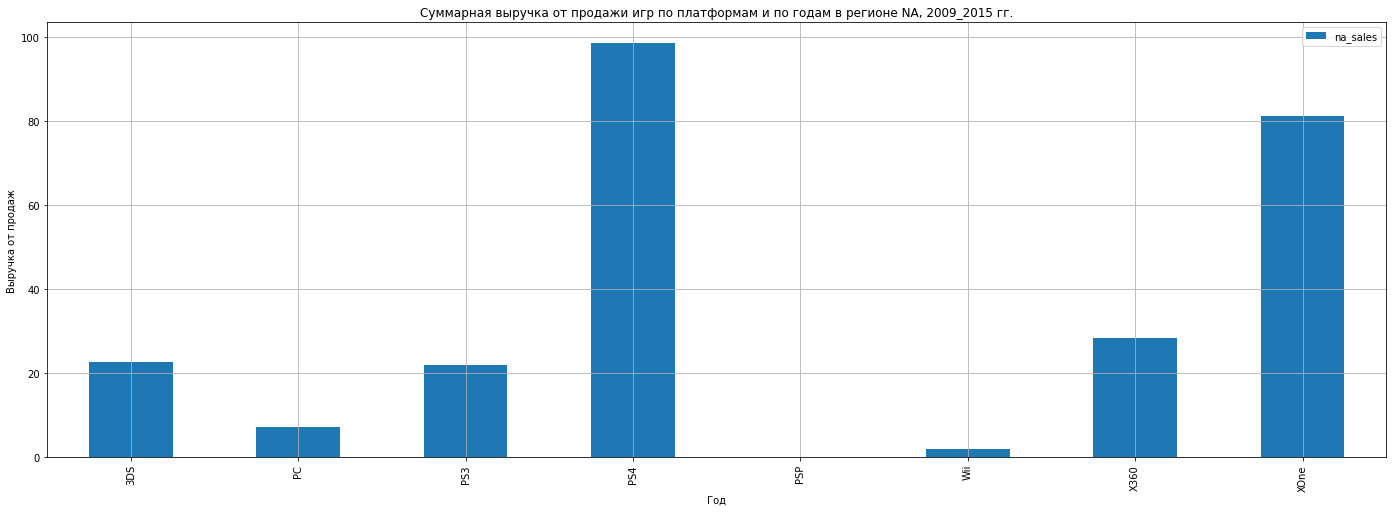

In [41]:
(
    games_db_actual.pivot_table(index = 'platform', values=['na_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'na_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам и по годам в регионе NA, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

На регион приходится почти половина всех продаж. И поэтому картина схожа с общей. Самые популярные платформы (ТОП-5) (в порядке убывания) PS4, XOne, X360, 3DS, PS3. Причем X360 и PS3 в нисходящей части цикла.

#### Самые популярные жанры

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по жанрам и по годам в регионе NA, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

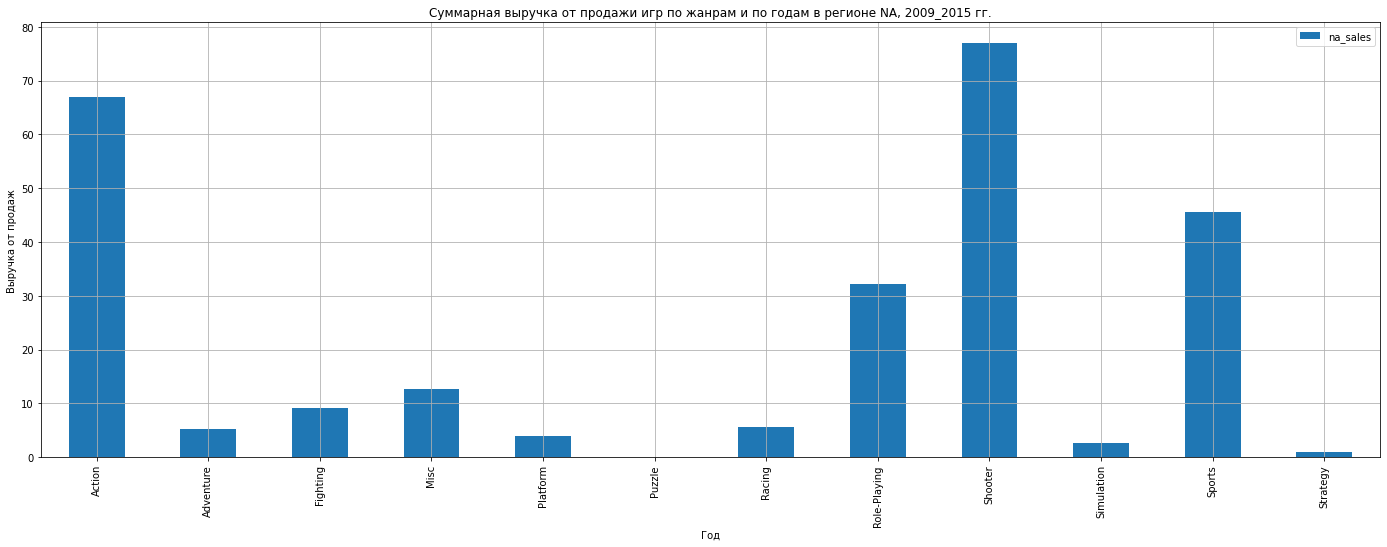

In [42]:
(
    games_db_actual.pivot_table(index = 'genre', values=['na_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'na_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по жанрам и по годам в регионе NA, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

Картина по жанрам в этом регионе также похожа на общую. Самые популярные (ТОП-5, по убыванию): Shooter, Action , Sports, RPG, Misc

#### Влияние рейтинга ESRB на продажи в регионе

[Text(0.5, 1.0, 'Суммарная выручка в зависимости от рейтинга ESRB в регионе NA, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

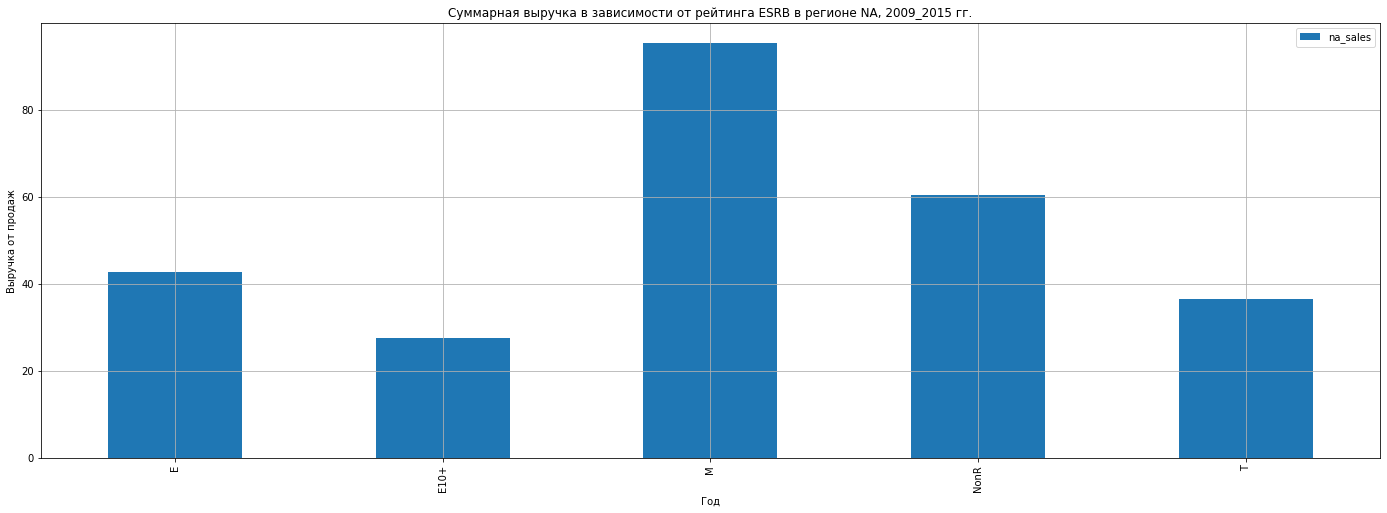

In [43]:
(games_db_actual.pivot_table(index = 'rating', values=['na_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'na_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка в зависимости от рейтинга ESRB в регионе NA, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

Рейтинги такого рода все же носят рекомендательный характер. Делать какие-либо выводы сложно. Однозначно самый большой объем продаж приходится на игры для взрослых (а если к ним добавить игры для подростков), то больше половины. Понятно, что в эту категорию попадут почти все игры в жанрах Action и Shooter (два самых популярных жанра). Так что зависимость есть от жанра, а не от этого рейтинга.

### Регион JP

#### Самые популярные платформы

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам и по годам в регионе JP, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

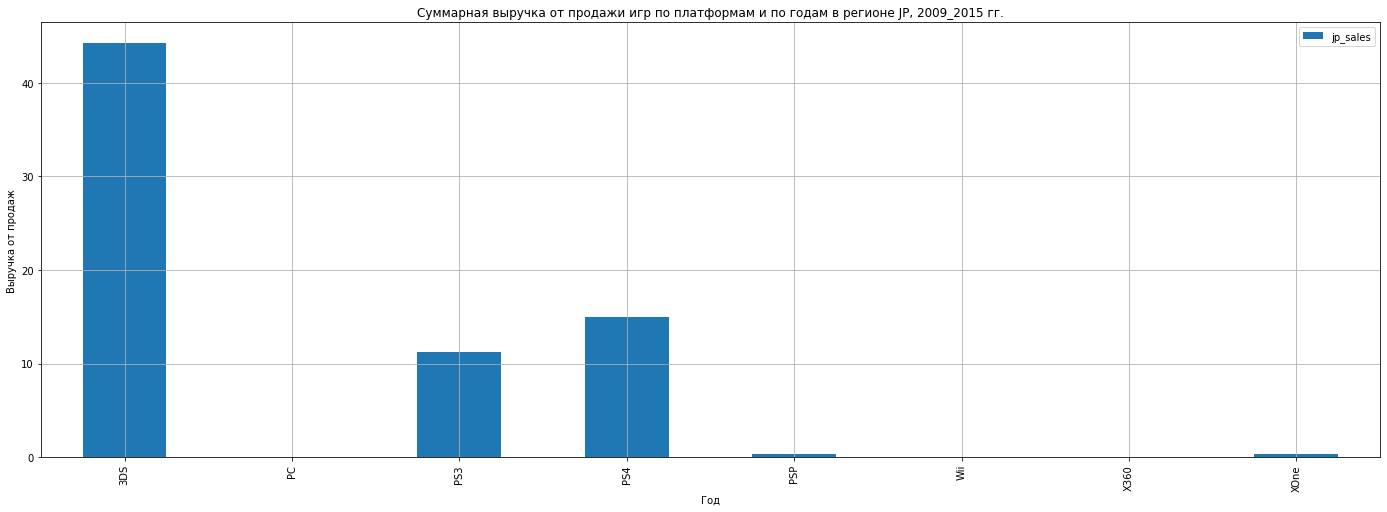

In [44]:
(
    games_db_actual.pivot_table(index = 'platform', values=['jp_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'jp_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам и по годам в регионе JP, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

Так вот кто любит 3DS! Где разработали, там и пригодилась больше всего. А еще они любят (в порядке убывания) PS4, PS3, PSP, XOne. А все остальное не любят. Совсем.

#### Самые популярные жанры

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам и по годам в регионе JP, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

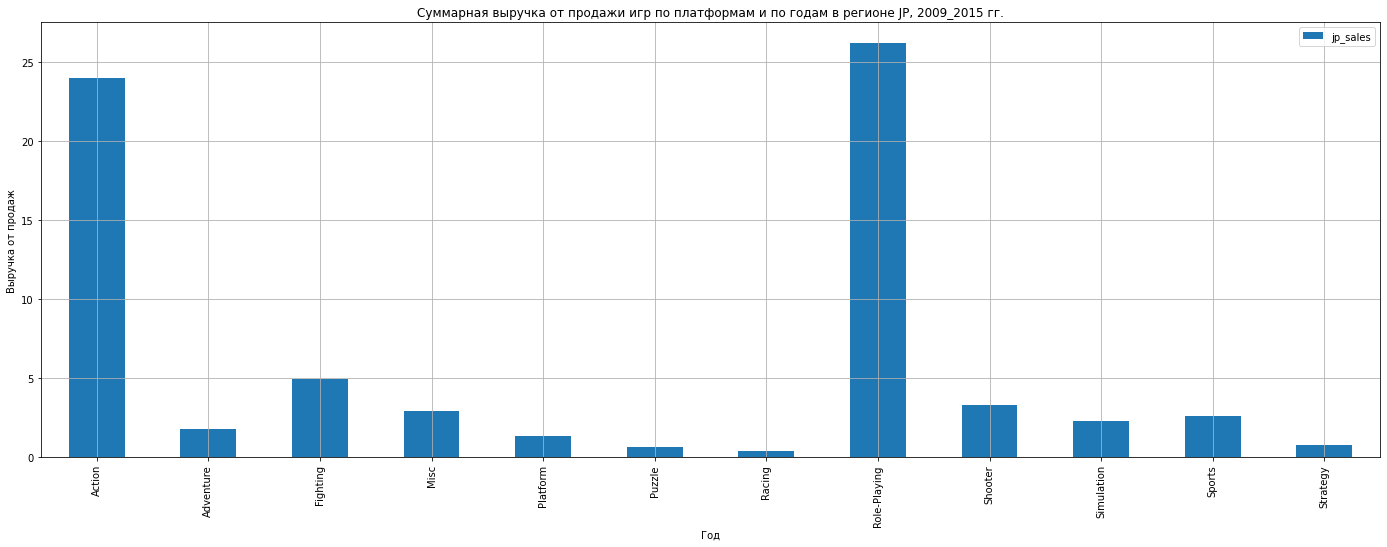

In [45]:
(
    games_db_actual.pivot_table(index = 'genre', values=['jp_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'jp_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам и по годам в регионе JP, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

ТОП-5 по жанрам. А еще они безусловно больше любят RPG и Action. И гораздо меньшь Fighting, Shooter, Misc.

####  Влияние рейтинга ESRB на продажи в регионе

[Text(0.5, 1.0, 'Суммарная выручка в зависимости от рейтинга ESRB в регионе JP, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

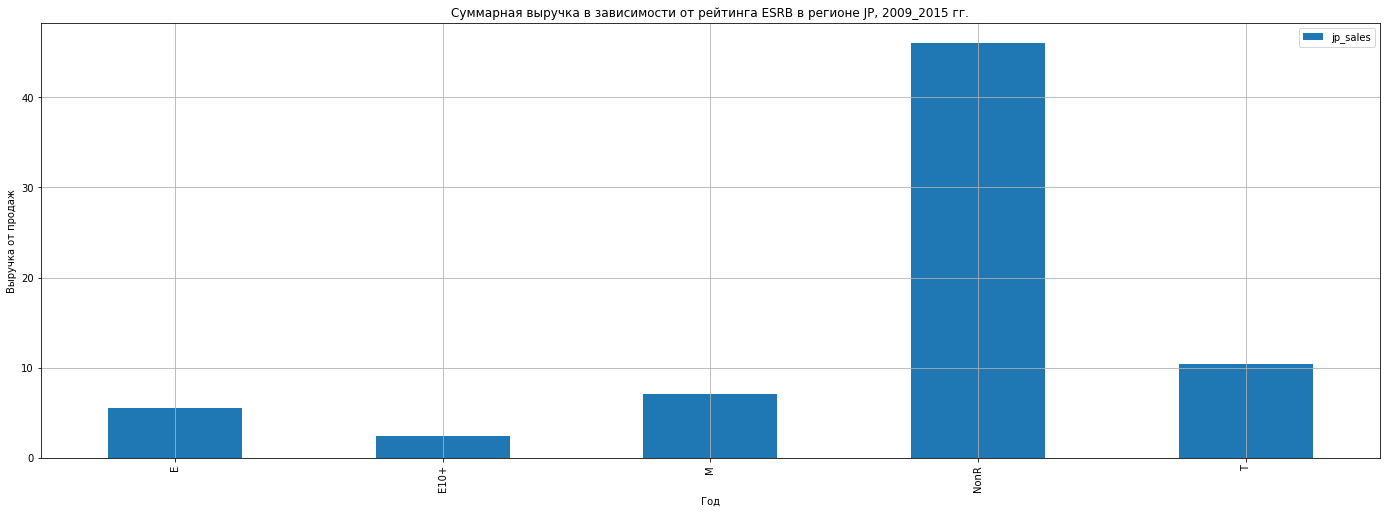

In [46]:
(games_db_actual.pivot_table(index = 'rating', values=['jp_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'jp_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка в зависимости от рейтинга ESRB в регионе JP, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

Большинство игр продаются без рейтинга агентства. Видимо, в связи с тем, что в основном платформы, разработанные в этом же регионе.

### Регион EU

#### Самые популярные платформы

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам и по годам в регионе EU, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

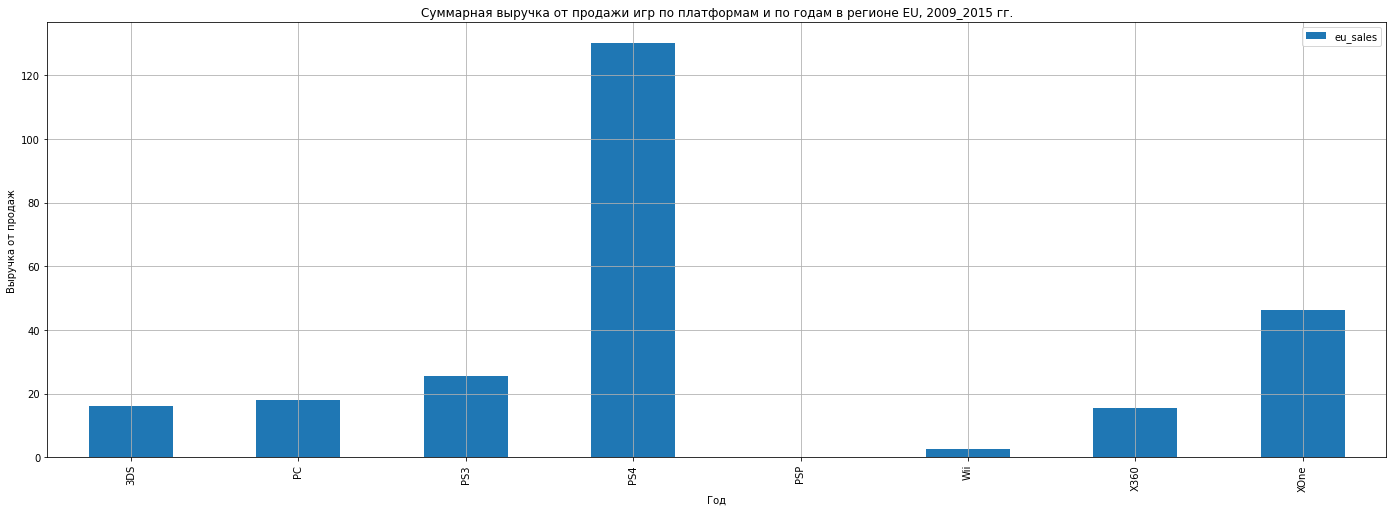

In [47]:
(
    games_db_actual.pivot_table(index = 'platform', values=['eu_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'eu_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам и по годам в регионе EU, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

В регионе EU ТОП-5 платформ (по убыванию): PS4, XOne, PS3, PC, 3DS

#### Самые популярные жанры

[Text(0.5, 1.0, 'Суммарная выручка от продажи игр по платформам и по годам в регионе EU, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

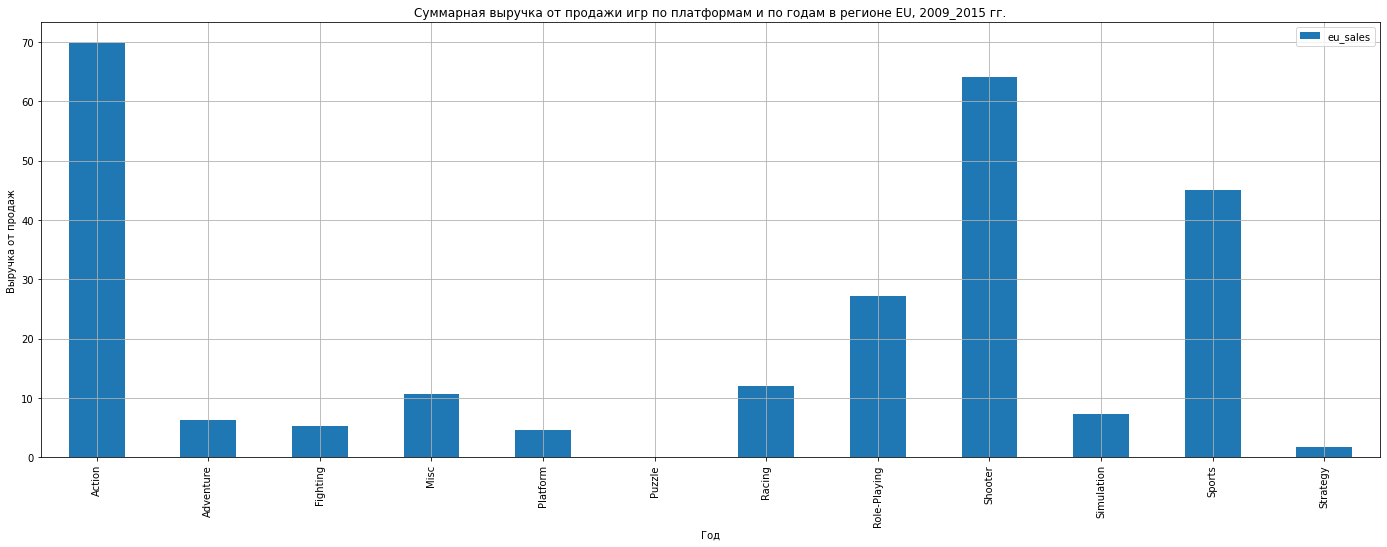

In [48]:
(
    games_db_actual.pivot_table(index = 'genre', values=['eu_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'eu_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка от продажи игр по платформам и по годам в регионе EU, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

В регионе EU ТОП-5 жанров (по убыванию): Action, Shooter, Sports, RPG, Racing

#### Влияние рейтинга ESRB на продажи в регионе

[Text(0.5, 1.0, 'Суммарная выручка в зависимости от рейтинга ESRB в регионе EU, 2009_2015 гг.'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Выручка от продаж')]

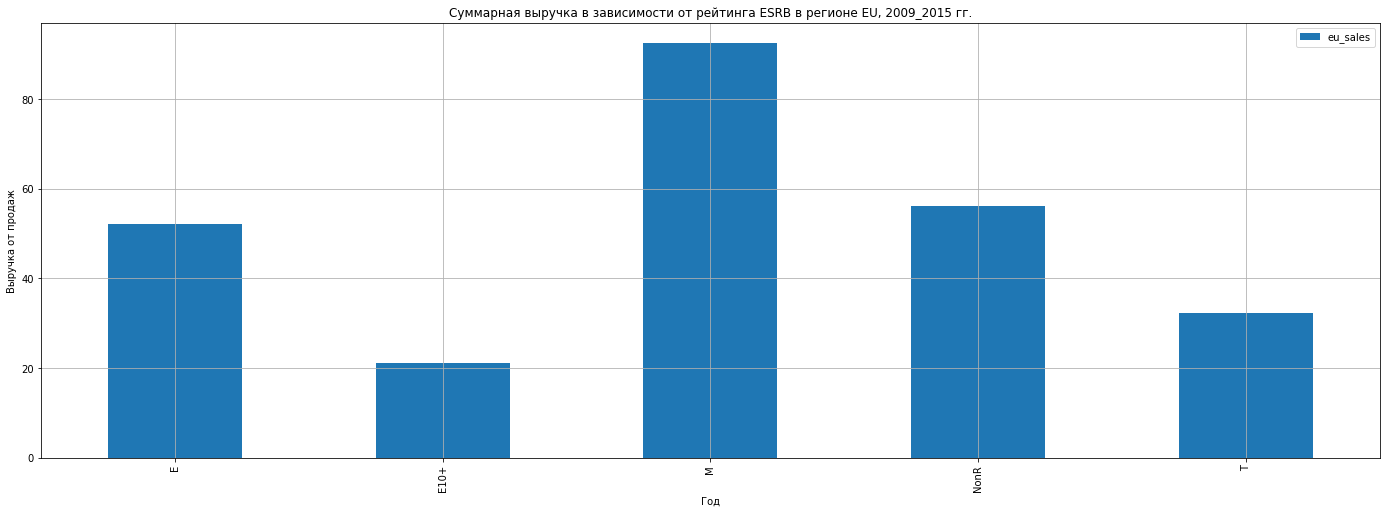

In [49]:
(games_db_actual.pivot_table(index = 'rating', values=['eu_sales'],
                                   aggfunc='sum').plot(kind='bar', y = 'eu_sales',grid=True, figsize=(24, 8))
 .set(title = 'Суммарная выручка в зависимости от рейтинга ESRB в регионе EU, 2009_2015 гг.', xlabel = 'Год',
      ylabel = 'Выручка от продаж')
)

С точки зрения связи рейтинга и объемов все также как и в регионе NA. Больше 50% продаж приходятся на игры для взрослых и подростков (Action и Shooter). К тому же у европейцев есть своя организация для рейтингов.

Доли регионов в общей выручке от продаж, 2009_2015 гг.


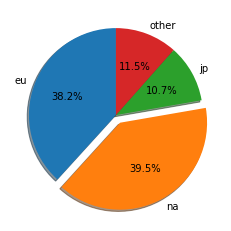

In [50]:

regions= 'eu','na','jp','other'
regions_eu = games_db_actual['eu_sales'].sum() 
regions_jp = games_db_actual['jp_sales'].sum()
regions_na = games_db_actual['na_sales'].sum()
regios_other = games_db_actual['other_sales'].sum()
sales = [regions_eu,regions_na,regions_jp, regios_other]



fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0) 
ax1.pie(sales, explode=explode, labels=regions,autopct='%1.1f%%',
        shadow=True, startangle=90)
print ('Доли регионов в общей выручке от продаж, 2009_2015 гг.')
plt.show()

### Выводы:

1. Пользователи региона NA приносят более 40% от общих продаж. Самые любимые платформы XOne и PS4. Самые любимые жанры Action и Shooter. Больше 45% продаж на игры с рейтингами для взрослых и подростков.
2. Пользователи региона EU схожи с пользователями региона NA. Их доля 32% от общего объема. Но PS4 они любят гораздо больше, чем XOne.
3. Пользователи региона JP сильно отличаются (хотя и привносят только около 11% общей выручки. Любимая платформа с большим отрывом 3DS, а затем PS4. Других они вообще не видят. И предпочитают они RPG и Sports. А рейтинги на их игры, видимо, по большей части вообще не формируются.

## Проверка гипотез

В начале подготовим выборку из актуального датафрейма, где не будет строк со значениями 'tbd' в столбце user_score, а остальные данные в нем будут приведены к типу float

In [51]:
games_db_actual_user = games_db_actual.query('user_score!="tbd"')

games_db_actual_user_c = games_db_actual_user.copy()
games_db_actual_user_c['user_score'] = [float(x) for x in games_db_actual_user['user_score']]


games_db_actual_user_c.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 1319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            767 non-null    int64  
 1   name             767 non-null    object 
 2   platform         767 non-null    object 
 3   year_of_release  767 non-null    int64  
 4   genre            767 non-null    object 
 5   na_sales         767 non-null    float64
 6   eu_sales         767 non-null    float64
 7   jp_sales         767 non-null    float64
 8   other_sales      767 non-null    float64
 9   critic_score     767 non-null    float64
 10  user_score       767 non-null    float64
 11  rating           767 non-null    object 
 12  sales_total      767 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ KB


### О равенстве средних пользовательских рейтингов платформ Xbox и PC.

In [52]:
games_db_actual_user_c['platform'].unique()

array(['PS4', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'Wii'], dtype=object)

Создадим выборку с пользовательскими рейтингами для платформы Xbox

In [53]:
user_rating_xbox = games_db_actual_user_c.query('platform=="XOne"')
user_rating_xbox = user_rating_xbox['user_score']
user_rating_xbox.describe()


count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

Создадим выборку с пользовательскими рейтингами для платформы PC

In [54]:
user_rating_pc = games_db_actual_user_c.query('platform=="PC"')
user_rating_pc = user_rating_pc['user_score']
user_rating_pc.describe()



count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

<AxesSubplot:>

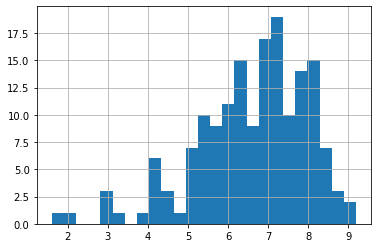

In [55]:
user_rating_xbox.hist(bins=25)

<AxesSubplot:>

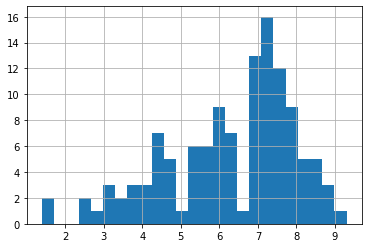

In [56]:
user_rating_pc.hist(bins=25)

Распределения близки к нормальным, поэтому для проверки гипотез будем использовать t-тест. Но дисперсии не будем считать одинаковыми.

Так как st.ttest_ind проверяет равенство, то мы выдвинем нулевую гипотезу совпадающую с проверяемой, что средние равны. Альтернативная гипотеза: что средние значения пользовательских рейтингов не равны.

In [57]:
results = st.ttest_ind(
    user_rating_xbox, 
    user_rating_pc)
if results.pvalue<0.01:
     print ('Средняя оценка пользователей для платформ Xbox и PC совпадает. pvalue = ',results.pvalue)
else:
    print ('Средняя оценка пользователей для платформ Xbox и PC различается. pvalue = ',results.pvalue)
print (results)

Средняя оценка пользователей для платформ Xbox и PC различается. pvalue =  0.10450507919348415
Ttest_indResult(statistic=1.6285882029651313, pvalue=0.10450507919348415)


Нулевая гипотеза не подтвердилась. Средние не равны. Отбрасываем нулевую гипотезу

### О неравенстве пользовательских рейтингов жанров Action и Sports.

Создадим выборку с пользовательскими оценками для жанра Action

In [58]:
user_rating_action= games_db_actual_user_c.query('genre=="Action"')
user_rating_action = user_rating_action['user_score']
user_rating_action.describe()

count    246.000000
mean       6.669512
std        1.366421
min        2.000000
25%        6.000000
50%        7.000000
75%        7.600000
max        9.000000
Name: user_score, dtype: float64

Создадим выборку с пользовательскими оценками для жанра Sports

In [59]:
user_rating_sports= games_db_actual_user_c.query('genre=="Sports"')
user_rating_sports = user_rating_sports['user_score']
user_rating_sports.describe()

count    122.000000
mean       5.183607
std        1.841907
min        0.200000
25%        4.000000
50%        5.500000
75%        6.575000
max        8.700000
Name: user_score, dtype: float64

Так как st.ttest_ind проверяет равенство, то мы выдвинем нулевую гипотезу, противоположную проверяемой. А именно, что средние рейтинги равны. Альтернативная гипотеза, что средние рейтинги не равны.

In [60]:
results_g = st.ttest_ind(
    user_rating_action, 
    user_rating_sports)
if results_g.pvalue<0.01:
     print ('Средняя оценка пользователей для жанров Action и Sports совпадает. pvalue = ',results_g.pvalue)
else:
    print ('Средняя оценка пользователей для жанров Action и Sports различается. pvalue = ',results_g.pvalue)
print (results_g)

Средняя оценка пользователей для жанров Action и Sports совпадает. pvalue =  1.0330113164241167e-16
Ttest_indResult(statistic=8.713815105661457, pvalue=1.0330113164241167e-16)


Нулевая гипотеза о равенстве оценок пользователей Action и Sports подтвердилась. Средние равны. А наше исходное предположение об их неравенстве наоборот.

## Выводы

1. В ходе исследования были открыты и исследованы исходные файлы. В ходе предобработки:
   
    - Названия всех столбцов перевели в "змеиный" регистр.
    - Удалили строки с пустым значением в столбце name.
    - Заполнили пропущенные значения в 'critic_score' на -1, 'rating' на NonR, 'user_score' на tbd.
    - строки, где отсутствует значение в 'year_of_release' отбросили.
    - В столбце year_of_release изменили тип данных на целочисленный.
    - Добавили столбец sales_total, содержащий суммарные продажи по каждой игре по всем регионам.

2. На этапе исследовательского анализа данных установлено:
    - Для построения прогноза будет вполне достаточно данных за 2014-2016 годы.
    - В прошлом самыми прибыльными игровыми платформами были Wii, DS, X360, PS3, PS2, PS. На момент исследования самыми актуальными платформами являются PS4, XOne. В меньшей степени 3DS.
    - Влияние оценок критиков и пользователей на объемы продаж пренебрежимо мало.
    - Самыми прибыльными жанрами являются (в порядке убывания) Action, Shooter, Sports, RPG.
3. На этапе составления портретов пользователей различный регионов установили:
    - Пользователи региона NA приносят более 40% от общих продаж. Самые популярные платформы (ТОП-5) (в порядке убывания) PS4, XOne, X360, 3DS, PS3. Самые популярные (ТОП-5, по убыванию): Shooter, Action , Sports, RPG, Misc. Больше 45% продаж на игры с рейтингами для взрослых и подростков.
    - В регионе EU ТОП-5 платформ (по убыванию): PS4, XOne, PS3, PC, 3DS.В регионе EU ТОП-5 жанров (по убыванию): Action, Shooter, Sports, RPG, Racing
    - Пользователи региона JP сильно отличаются (хотя и привносят только около 11% общей выручки). Любимая платформа с большим отрывом 3DS.А еще они любят (в порядке убывания) PS4, PS3, PSP, XOne. Других они вообще не видят. ОП-5 по жанрам. А еще они безусловно больше любят RPG и Action. И гораздо меньше Fighting, Shooter, Misc.
4. На этапе проверки статистических гипотез установили, что:
    - средние оценки пользователей для платформ Xbox и PC не равны.
    - средние оценки пользователей для жанров Action и Sports равны.
    
5. В продажах на следующий период компании нужно сосредоточиться на играх жанров Action, Shooter,Sports, RPG для платформ XOne и PS4 в регионах NA и EU.
6. В продажах на регион JP нужно сосредоточиться на играх жанров RPG и Action для платформы 3DS (в основном) и PS4.
